In [6]:
from scipy.stats import variation 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from preprocessing import differenciation

In [91]:
leh=pd.read_csv('2008-01-02-LEH.N-bbo.csv',index_col=0)
leh.index=pd.DatetimeIndex(leh.index)

yahoo=pd.read_csv('2008-01-02-YHOO.OQ-bbo.csv',index_col=0)
yahoo.index=pd.DatetimeIndex(yahoo.index)

msft=pd.read_csv('2008-01-02-MSFT.O-bbo.csv',index_col=0)
msft.index=pd.DatetimeIndex(msft.index)

sentiment=pd.read_csv('Headline_Sentiment.csv',index_col=0)
sentiment.index=pd.DatetimeIndex(sentiment.index)


leh3=pd.read_csv('2008-01-03-LEH.N-bbo.csv',index_col=0)
leh3.index=pd.DatetimeIndex(leh3.index)

yahoo3=pd.read_csv('2008-01-03-YHOO.OQ-bbo.csv',index_col=0)
yahoo3.index=pd.DatetimeIndex(yahoo3.index)

msft3=pd.read_csv('2008-01-03-MSFT.O-bbo.csv',index_col=0)
msft3.index=pd.DatetimeIndex(msft3.index)

Scaletime, remove duplicated index, and create return variables

In [92]:
leh.index=leh.index.floor('S')
msft.index=msft.index.floor('S')
yahoo.index=yahoo.index.floor('S')

leh=leh[~leh.index.duplicated(keep='last')]
yahoo=yahoo[~yahoo.index.duplicated(keep='last')]
msft=msft[~msft.index.duplicated(keep='last')]


leh.columns=[['leh bp','leh bv','leh ap','leh av']]
yahoo.columns=[['yahoo bp','yahoo bv','yahoo ap','yahoo av']]
msft.columns=[['msft bp','msft bv','msft ap','msft av']]

leh3.index=leh3.index.floor('S')
msft3.index=msft3.index.floor('S')
yahoo3.index=yahoo3.index.floor('S')

leh3=leh3[~leh3.index.duplicated(keep='last')]
yahoo3=yahoo3[~yahoo3.index.duplicated(keep='last')]
msft3=msft3[~msft3.index.duplicated(keep='last')]

leh3.columns=[['leh bp','leh bv','leh ap','leh av']]
yahoo3.columns=[['yahoo bp','yahoo bv','yahoo ap','yahoo av']]
msft3.columns=[['msft bp','msft bv','msft ap','msft av']]


leh['leh ar']=leh['leh ap'].diff()
yahoo['yahoo ar']=yahoo['yahoo ap'].diff()
msft['msft ar']=msft['msft ap'].diff()

leh['leh br']=leh['leh bp'].diff()
yahoo['yahoo br']=yahoo['yahoo bp'].diff()
msft['msft br']=msft['msft bp'].diff()

leh3['leh ar']=leh3['leh ap'].diff()
yahoo3['yahoo ar']=yahoo3['yahoo ap'].diff()
msft3['msft ar']=msft3['msft ap'].diff()

leh3['leh br']=leh3['leh bp'].diff()
yahoo3['yahoo br']=yahoo3['yahoo bp'].diff()
msft3['msft br']=msft3['msft bp'].diff()


# leh['leh ar']=pd.Series(np.array(leh['leh ap'])[:,0]).diff()
# yahoo['yahoo ar']=pd.Series(np.array(yahoo['yahoo ap'])[:,0]).diff()
# msft['msft ar']=pd.Series(np.array(msft['msft ap'])[:,0]).diff()

# leh['leh br']=pd.Series(np.array(leh['leh bp'])[:,0]).diff()
# yahoo['yahoo br']=pd.Series(np.array(yahoo['yahoo bp'])[:,0]).diff()
# msft['msft br']=pd.Series(np.array(msft['msft bp'])[:,0]).diff()

# leh3['ar']=pd.Series(np.array(leh3['leh ap'])[:,0]).diff()
# yahoo3['yahoo ar']=pd.Series(np.array(yahoo3['yahoo ap'])[:,0]).diff()
# msft3['msft ar']=pd.Series(np.array(msft['msft ap'])[:,0]).diff()

# leh3['leh br']=pd.Series(np.array(leh3['leh bp'])[:,0]).diff()
# yahoo3['yahoo br']=pd.Series(np.array(yahoo3['yahoo bp'])[:,0]).diff()
# msft3['msft br']=pd.Series(np.array(msft['msft bp'])[:,0]).diff()

print(leh.head(10))
print(yahoo.head(10))
print(msft.head(10))

                    leh bp leh bv leh ap leh av leh ar leh br
time                                                         
2008-01-02 14:31:59  64.86     30  65.00     63    NaN    NaN
2008-01-02 14:32:00  64.80      1  64.94      2  -0.06  -0.06
2008-01-02 14:32:01  64.95      4  65.00     60   0.06   0.15
2008-01-02 14:32:02  64.91      1  64.96      2  -0.04  -0.04
2008-01-02 14:32:03  64.89      1  64.95      2  -0.01  -0.02
2008-01-02 14:32:04  64.95      5  65.00     60   0.05   0.06
2008-01-02 14:32:05  64.95      2  64.98      6  -0.02   0.00
2008-01-02 14:32:06  64.91      1  64.98      6   0.00  -0.04
2008-01-02 14:32:07  64.91      4  64.96      1  -0.02   0.00
2008-01-02 14:32:08  64.88      5  64.96      6   0.00  -0.03
                    yahoo bp yahoo bv yahoo ap yahoo av yahoo ar yahoo br
time                                                                     
2008-01-02 12:07:18    23.41      7.0     23.7        3      NaN      NaN
2008-01-02 12:07:38    23.41      

Concat

In [93]:
df=pd.concat([leh,yahoo,msft],axis=1)
df=df.dropna()


df3=pd.concat([leh3,yahoo3,msft3],axis=1)
df3=df3.dropna()
df

leh bp leh bv leh ap leh av leh ar leh br yahoo bp  \
time                                                                     
2008-01-02 14:32:01  64.95    4.0  65.00   60.0   0.06   0.15    23.87   
2008-01-02 14:32:02  64.91    1.0  64.96    2.0  -0.04  -0.04    23.88   
2008-01-02 14:32:04  64.95    5.0  65.00   60.0   0.05   0.06    23.88   
2008-01-02 14:32:05  64.95    2.0  64.98    6.0  -0.02   0.00    23.90   
2008-01-02 14:32:06  64.91    1.0  64.98    6.0   0.00  -0.04    23.90   
...                    ...    ...    ...    ...    ...    ...      ...   
2008-01-02 20:59:54  62.18  278.0  62.24    1.0   0.00   0.00    23.73   
2008-01-02 20:59:57  62.19   39.0  62.23    5.0   0.01   0.00    23.73   
2008-01-02 20:59:58  62.19   40.0  62.23    5.0   0.00   0.00    23.73   
2008-01-02 20:59:59  62.23   33.0  62.24    5.0   0.01   0.04    23.73   
2008-01-02 21:00:00  62.23   23.0  62.24    5.0   0.00   0.00    23.73   

                    yahoo bv yahoo ap yahoo av yahoo ar yahoo br msft bp  \
time                                                                       
2008-01-02 14:32:01     24.0    23.89     63.0     0.00     0.00   35.84   
2008-01-02 14:32:02     25.0    23.89      1.0     0.00     0.01   35.85   
2008-01-02 14:32:04     29.0    23.90      4.0     0.00     0.00   35.85   
2008-01-02 14:32:05      2.0    23.91     14.0     0.01     0.02   35.86   
2008-01-02 14:32:06      1.0    23.91     15.0     0.00     0.00   35.86   
...                      ...      ...      ...      ...      ...     ...   
2008-01-02 20:59:54    109.0    23.74     17.0    -0.01    -0.01   35.23   
2008-01-02 20:59:57    136.0    23.74     16.0     0.00     0.00   35.23   
2008-01-02 20:59:58    152.0    23.74     14.0     0.00     0.00   35.23   
2008-01-02 20:59:59    172.0    23.74     14.0     0.00     0.00   35.23   
2008-01-02 21:00:00    175.0    23.74     10.0     0.00     0.00   35.22   

                    msft bv msft ap msft av msft ar msft br  
time                                                         
2008-01-02 14:32:01    26.0   35.85     1.0    0.00    0.00  
2008-01-02 14:32:02    24.0   35.86    15.0    0.01    0.01  
2008-01-02 14:32:04    57.0   35.87    24.0    0.01    0.00  
2008-01-02 14:32:05    22.0   35.87    10.0    0.00    0.01  
2008-01-02 14:32:06     3.0   35.87    22.0    0.00    0.00  
...                     ...     ...     ...     ...     ...  
2008-01-02 20:59:54    10.0   35.23     1.0    0.00    0.00  
2008-01-02 20:59:57     9.0   35.23     1.0    0.00    0.00  
2008-01-02 20:59:58     6.0   35.23    10.0    0.00    0.00  
2008-01-02 20:59:59    25.0   35.23     9.0    0.00    0.00  
2008-01-02 21:00:00   663.0   35.23     9.0    0.00   -0.01  

[13186 rows x 18 columns]

Linear Regression

In [12]:
def vectorize(a,b):
    v_a=np.array(df[a])[:,0]
    v_b=np.array(df[b])[:,0]
    return v_a,v_b

In [43]:
a='msft bp'
b='leh ap'
x,y=vectorize(a,b)
pearsonr(x,y)

(0.9104347632780935, 0.0)

Make test and train set 

In [99]:
split = 0.80
isplit = int(len(df)*split)
xt = df.loc[:,df.columns!='msft ar']
yt = df['msft ar']
xtrain, ytrain, xtest, ytest = xt[:isplit], yt[1:isplit+1], xt[isplit:-1], yt[isplit+1:]
print(len(xtrain.index),len(ytrain.index))

10548 10548


In [100]:

lr=LinearRegression().fit(xtrain,ytrain)

In [101]:
print(lr.score(xtest,ytest))
print(lr.score(xtrain,ytrain))

0.09005702224188472
0.10147393219243939


[]

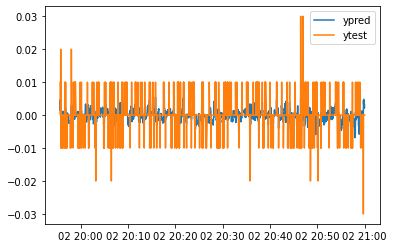

In [102]:
ypred=lr.predict(xtest)
plt.plot(xtest.index,ypred,label='ypred')
plt.plot(xtest.index,ytest,label='ytest')
plt.legend()
plt.plot()

Train over day 2 and test over day 3

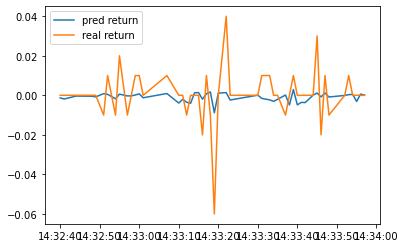

In [109]:
xt3 = df3.loc[:,df.columns!='msft ar']
r3 = np.array(df3['msft ar'])[:,0]
rpred3=np.array(lr.predict(xt3))[:,0]

# figure, axis = plt.subplots(2, 1) 
# axis[0].plot(xt3.index[:50],rt3[:50],label='ypred')
# axis[1].plot(xt3.index[:50],r3[:50],label='real')

plt.plot(xt3.index[:50],rpred3[:50], label='pred return')
plt.plot(xt3.index[:50],r3[:50], label='real return')
plt.legend()
plt.show()